## K-Means Clustering from Scratch

This notebook implements the **K-Means clustering algorithm** using NumPy, without relying on "scikit-learn"'s built-in KMeans class. The goal is to understand the inner workings of the algorithm — from centroid initialization to convergence.

What’s included:
- Manual implementation of the K-Means algorithm
- Vectorized computation of distance matrices using NumPy
- Iterative centroid updates until convergence
- Cluster visualization and performance evaluation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
def kmeans(data, k):
    num_data = np.shape(data)[0]

    # Randomly select k initial cluster centers from the data points
    cluster_mean = data[np.random.choice(range(num_data), k)]

    mean_dist_mat = np.linalg.norm(np.expand_dims(data, axis=0) - np.expand_dims(cluster_mean, axis=1), axis=2)
    cluster_allocation = np.argmin(mean_dist_mat, axis=0)

    # Iterate until the clusters stabilize (convergence)
    updated = True
    while updated:
        updated = False

        # Recalculate the cluster centers based on the current data point allocation
        cluster_mean = np.array([np.sum(data[cluster_allocation == i], axis=0) / np.sum(cluster_allocation == i) for i in range(k)])

        # Recalculate the distance matrix and find the closest cluster for each data point
        mean_dist_mat = np.linalg.norm(np.expand_dims(data, axis=0) - np.expand_dims(cluster_mean, axis=1), axis=2)
        new_cluster_allocation = np.argmin(mean_dist_mat, axis=0)

        # Check for changes in cluster allocation and update if necessary
        if not np.array_equal(cluster_allocation, new_cluster_allocation):
            updated = True
            cluster_allocation = new_cluster_allocation
        else:
            loss = np.sum(np.min(mean_dist_mat, axis=0))

    return cluster_allocation, loss

#### Kernel K-means Clustering

In [3]:
def kernel_kmeans(data, k, s, kernel='gaussian'):
    num_data = np.shape(data)[0]

    # Randomly select k initial cluster centers from the data points
    cluster_mean = data[np.random.choice(range(num_data), k)]

    # Compute the pairwise distance matrix
    mean_dist_mat = np.linalg.norm(np.expand_dims(data, axis=0) - np.expand_dims(cluster_mean, axis=1), axis=2)
    cluster_allocation = np.argmin(mean_dist_mat, axis=0)

    # Pre-calculate kernel values (e.g., Gaussian kernel) and store them in a matrix
    if kernel == 'gaussian':
        pre_cal = np.exp(-np.square(metrics.pairwise_distances(data)) / (2 * (s ** 2)))
    else:
        print("No such kernel")

    # Update clusters until convergence
    updated = True
    while updated:
        updated = False

        # Recalculate the distance between points and clusters based on kernel function
        mean_dist_mat = [1 - 2 * np.sum(pre_cal[:, cluster_allocation == idx], axis=1) / np.sum(cluster_allocation == idx)
                         + np.sum(pre_cal[cluster_allocation == idx][:, cluster_allocation == idx]) / (np.sum(cluster_allocation == idx) ** 2)
                         for idx in range(k)]

        new_cluster_allocation = np.argmin(mean_dist_mat, axis=0)

        if not np.array_equal(cluster_allocation, new_cluster_allocation):
            updated = True
            cluster_allocation = new_cluster_allocation
        else:
            loss = np.sum(np.min(mean_dist_mat, axis=0))

    return cluster_allocation, loss

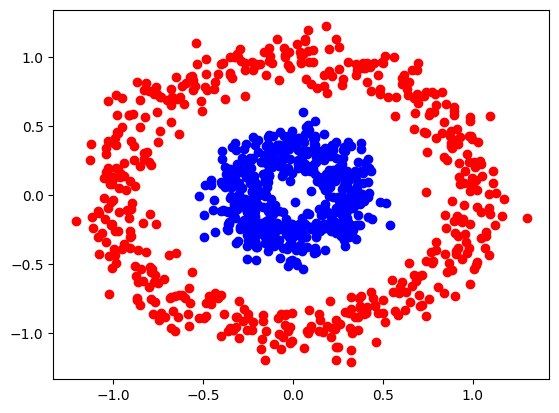

In [4]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise = 0.1, factor = 0.3, random_state = 10)
plt.figure()
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.show()

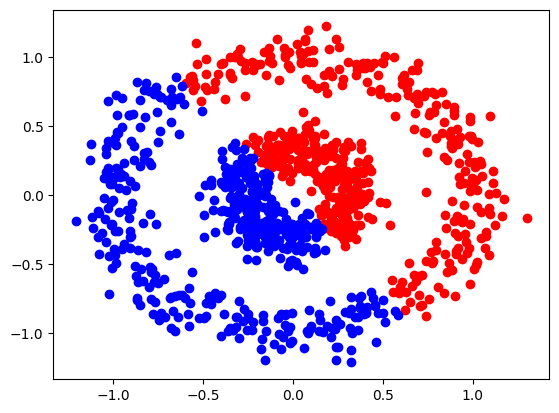

NMI score of K-means clustering:  0.0004879010473852295


In [5]:
np.random.seed(1)
loss = np.inf
for _ in range(10):
    kmeans_result,loss_tmp = kmeans(X, k=2)
    if loss > loss_tmp:
        loss = loss_tmp
        best_kmeans_result = kmeans_result
        score = metrics.normalized_mutual_info_score(y, kmeans_result)

plt.figure()
plt.scatter(X[kmeans_result == 0,0], X[kmeans_result == 0,1], color = 'red')
plt.scatter(X[kmeans_result == 1,0], X[kmeans_result == 1,1], color = 'blue')
plt.show()
print("NMI score of K-means clustering: ",score)

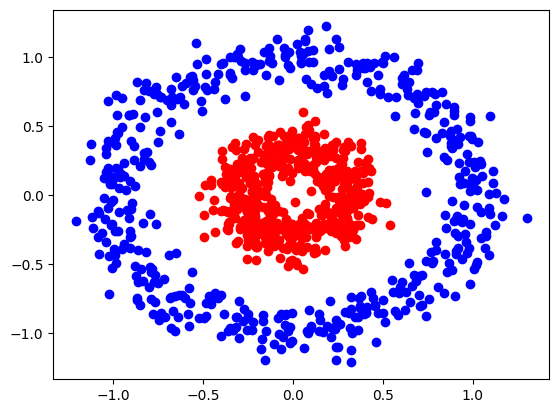

NMI score of kernel K-means clustering:  1.0


In [6]:
np.random.seed(1)
loss = np.inf
for _ in range(10):
    kkmeans_result,loss_tmp = kernel_kmeans(X, k=2, s = 0.5)
    if loss > loss_tmp:
        loss = loss_tmp
        best_kkmeans_result = kkmeans_result
        score = metrics.normalized_mutual_info_score(y, kkmeans_result)

plt.figure()
plt.scatter(X[best_kkmeans_result == 0,0], X[best_kkmeans_result == 0,1], color = 'red')
plt.scatter(X[best_kkmeans_result == 1,0], X[best_kkmeans_result == 1,1], color = 'blue')
plt.show()
print("NMI score of kernel K-means clustering: ",score)

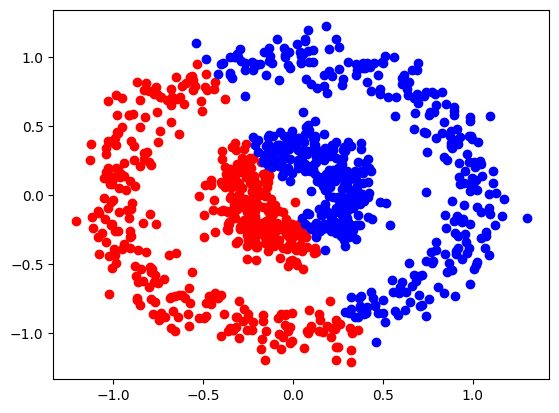

NMI score of kernel K-means clustering:  0.000490248977160696


In [7]:
np.random.seed(1)
loss = np.inf
for _ in range(10):
    kkmeans_result,loss_tmp = kernel_kmeans(X, k=2, s = 0.1)
    if loss > loss_tmp:
        loss = loss_tmp
        best_kkmeans_result = kkmeans_result
        score = metrics.normalized_mutual_info_score(y, kkmeans_result)

plt.figure()
plt.scatter(X[best_kkmeans_result == 0,0], X[best_kkmeans_result == 0,1], color = 'red')
plt.scatter(X[best_kkmeans_result == 1,0], X[best_kkmeans_result == 1,1], color = 'blue')
plt.show()
print("NMI score of kernel K-means clustering: ",score)

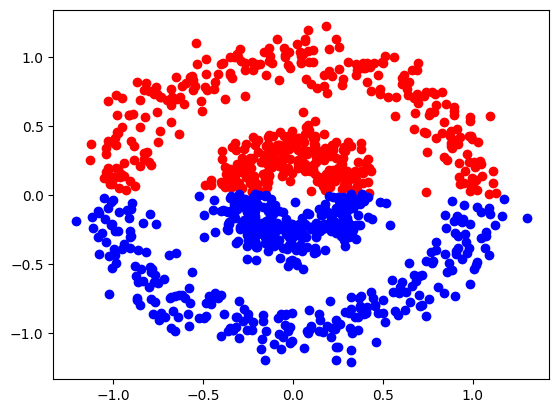

NMI score of kernel K-means clustering:  0.0004879010473852295


In [8]:
np.random.seed(1)
loss = np.inf
for _ in range(10):
    kkmeans_result,loss_tmp = kernel_kmeans(X, k=2, s = 1.5)
    if loss > loss_tmp:
        loss = loss_tmp
        best_kkmeans_result = kkmeans_result
        score = metrics.normalized_mutual_info_score(y, kkmeans_result)

plt.figure()
plt.scatter(X[best_kkmeans_result == 0,0], X[best_kkmeans_result == 0,1], color = 'red')
plt.scatter(X[best_kkmeans_result == 1,0], X[best_kkmeans_result == 1,1], color = 'blue')
plt.show()
print("NMI score of kernel K-means clustering: ",score)

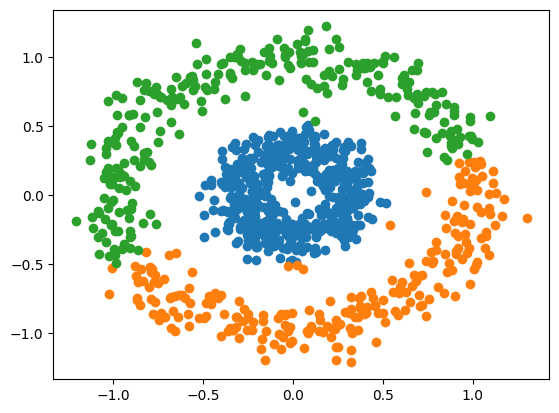

NMI score of kernel K-means clustering:  0.7615485444154068


In [9]:
np.random.seed(1)
loss = np.inf
for _ in range(10):
    kkmeans_result, loss_tmp = kernel_kmeans(X, k=3, s=0.5)
    if loss > loss_tmp:
        loss = loss_tmp
        best_kkmeans_result = kkmeans_result
        score = metrics.normalized_mutual_info_score(y, kkmeans_result)

plt.figure()
for i in range(3):
    plt.scatter(X[best_kkmeans_result == i, 0], X[best_kkmeans_result == i, 1], label=f'Cluster {i}')
plt.show()
print("NMI score of kernel K-means clustering: ", score)

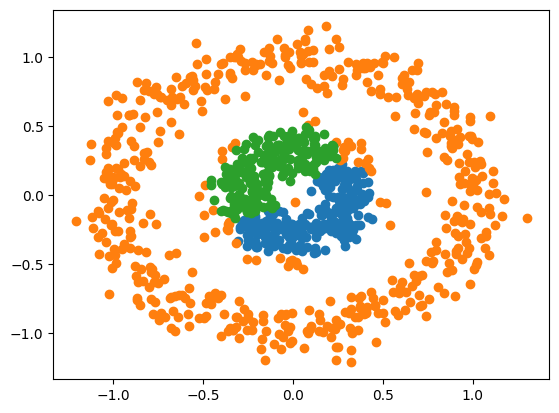

NMI score of kernel K-means clustering:  0.6285875138963313


In [10]:
np.random.seed(1)
loss = np.inf
for _ in range(10):
    kkmeans_result, loss_tmp = kernel_kmeans(X, k=3, s=0.1)
    if loss > loss_tmp:
        loss = loss_tmp
        best_kkmeans_result = kkmeans_result
        score = metrics.normalized_mutual_info_score(y, kkmeans_result)

plt.figure()
for i in range(3):
    plt.scatter(X[best_kkmeans_result == i, 0], X[best_kkmeans_result == i, 1], label=f'Cluster {i}')
plt.show()
print("NMI score of kernel K-means clustering: ", score)

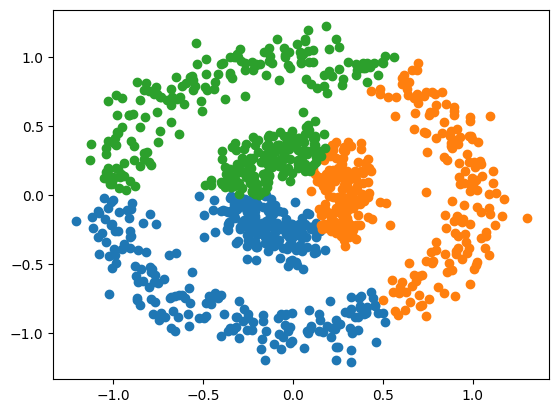

NMI score of kernel K-means clustering:  8.449131027698138e-05


In [11]:
np.random.seed(1)
loss = np.inf
for _ in range(10):
    kkmeans_result, loss_tmp = kernel_kmeans(X, k=3, s=1.5)
    if loss > loss_tmp:
        loss = loss_tmp
        best_kkmeans_result = kkmeans_result
        score = metrics.normalized_mutual_info_score(y, kkmeans_result)

plt.figure()
for i in range(3):
    plt.scatter(X[best_kkmeans_result == i, 0], X[best_kkmeans_result == i, 1], label=f'Cluster {i}')
plt.show()
print("NMI score of kernel K-means clustering: ", score)